**Which college majors will pay the bills?**

Wondering which engineering degree have higher mid career prospects? This project uses data collected from a year-long survey of 1.2 million people with only a bachelor's degree by PayScale Inc., made available at http://online.wsj.com/public/resources/documents/info-Degrees_that_Pay_you_Back-sort.html?mod=article_inline by the Wall Street Journal for their article Ivy League's Big Edge: Starting Pay. After doing some data clean up, we'll use techniques for determining the optimal number of clusters, apply a k-means clustering analysis, and visualize the results.

Steps

1. Import libraries
2. Load data and clean
3. Scale features to be used for clustering and append the scaled features to df
4. Subset dataset for clustering
5. Use elbow method to determine optimal number of clusters
6. Generate cluster centers
7. Assign labels to clusters
8. Plot

1. Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.vq import kmeans, vq, whiten
import seaborn as sns

2. Load and clean data

In [ ]:
df = pd.read_csv('Salary_data.csv')
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Undergraduate Major                                50 non-null     object
 1   Starting Median Salary                             50 non-null     object
 2   Mid-Career Median Salary                           50 non-null     object
 3   Percent change from Starting to Mid-Career Salary  50 non-null     object
 4   Mid-Career 10th Percentile Salary                  50 non-null     object
 5   Mid-Career 25th Percentile Salary                  50 non-null     object
 6   Mid-Career 75th Percentile Salary                  50 non-null     object
 7   Mid-Career 90th Percentile Salary                  50 non-null     object
dtypes: object(8)
memory usage: 3.2+ KB


In [ ]:
df.columns

Index(['Undergraduate Major', 'Starting Median Salary',
       'Mid-Career Median Salary',
       'Percent change from Starting to Mid-Career Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'],
      dtype='object')

In [ ]:
df.shape

(50, 8)

In [ ]:
# Strip $ in column values
# lstrip strips leading symbol
# strip strips on both ends
for c in df.columns:
  df[c] = df[c].str.lstrip("$")
  # df[c] = df[c].str.replace(".00", "")
  # remove comma in values
  df[c] = df[c].str.replace(",", "")

In [ ]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.00,77100.00,67.6,42200.00,56100.00,108000.00,152000.00
1,Aerospace Engineering,57700.00,101000.00,75.0,64300.00,82100.00,127000.00,161000.00
2,Agriculture,42600.00,71900.00,68.8,36300.00,52100.00,96300.00,150000.00
3,Anthropology,36800.00,61500.00,67.1,33800.00,45500.00,89300.00,138000.00
4,Architecture,41600.00,76800.00,84.6,50600.00,62200.00,97000.00,136000.00


In [ ]:
# storing dataframe columns in list
df_cols = ['Starting Median Salary',
       'Mid-Career Median Salary',
       'Percent change from Starting to Mid-Career Salary',
       'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary']

In [ ]:
# converting values in df_cols to float
# df[df_cols] = df[df_cols].apply(pd.to_numeric)
for c in df_cols:
  df[c] = df[c].astype(float)

In [ ]:
df.head(2)

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0


3. Scale features for clustering

In [ ]:
# put the target columns in list
# scale each column in a loop and create new dataframe
list_cols = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 90th Percentile Salary']
for c in list_cols:
  # scale with withen()
  df["".join((c, "_scaled"))] = whiten(df[c])

In [ ]:
df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Starting Median Salary_scaled,Mid-Career Median Salary_scaled,Mid-Career 10th Percentile Salary_scaled,Mid-Career 90th Percentile Salary_scaled
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0,4.963966,4.840925,3.552139,5.512973
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0,6.226539,6.341549,5.412382,5.839399
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0,4.597064,4.514430,3.055513,5.440434
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0,3.971172,3.861438,2.845078,5.005199
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0,4.489151,4.822089,4.259200,4.932660


4. Create dataframe subset with target columns for clustering

In [ ]:
# subset data for kmeans clustering
k_means_df = df[['Starting Median Salary_scaled', 'Mid-Career Median Salary_scaled', 'Mid-Career 10th Percentile Salary_scaled', 'Mid-Career 90th Percentile Salary_scaled']]

5. Create elbow plot to find the optimum number of clusters

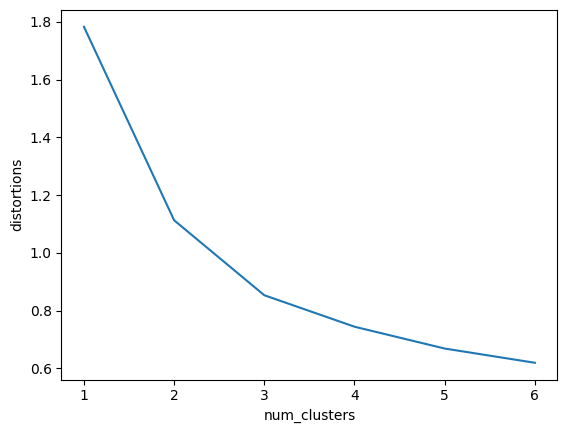

In [ ]:
# Determine the optimal number of clusters with the elbow method
distortions = []
num_clusters = range(1, 7)

# Create list of distortions from kmeans function
for i in num_clusters:
  cluster_centers, distortion = kmeans(k_means_df, i)
  distortions.append(distortion)

# Create a DataFrame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

6. Generate cluster centers
&
7. Assign labels to clusters

In [ ]:
# From plot above 3 is the optimal number of clusters

# Generate cluster centers
cluster_centers, distortion = kmeans(k_means_df, 3)
# Assign labels
k_means_df['cluster_labels'], distortion_list = vq(k_means_df, cluster_centers)

<ipython-input-16-4e1ca7c0dfc3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_means_df['cluster_labels'], distortion_list = vq(k_means_df, cluster_centers)


In [ ]:
k_means_df.head()

,Starting Median Salary_scaled,Mid-Career Median Salary_scaled,Mid-Career 10th Percentile Salary_scaled,Mid-Career 90th Percentile Salary_scaled,cluster_labels
0,4.963966,4.840925,3.552139,5.512973,0
1,6.226539,6.341549,5.412382,5.839399,1
2,4.597064,4.514430,3.055513,5.440434,0
3,3.971172,3.861438,2.845078,5.005199,2
4,4.489151,4.822089,4.259200,4.932660,0


8. Plot

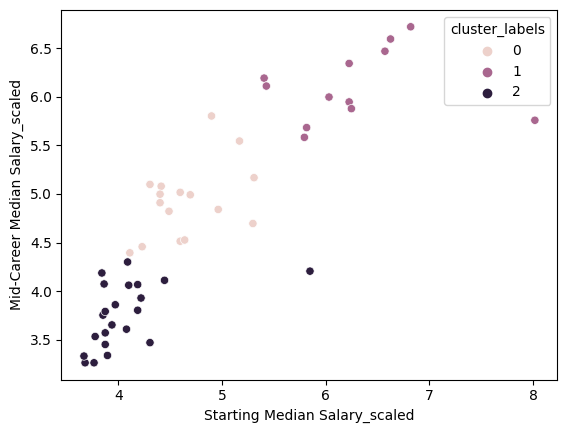

In [ ]:
# Plot the scatterplot of median salary and starting salary
sns.scatterplot(x='Starting Median Salary_scaled', y='Mid-Career Median Salary_scaled',
                hue='cluster_labels', data = k_means_df)
plt.show()

In [ ]:
# Add school major to k_means_df
k_means_df['Undergrad Major'] = df[['Undergraduate Major']]

<ipython-input-19-323137e628ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_means_df['Undergrad Major'] = df[['Undergraduate Major']]


Display degrees with highest paying jobs

In [ ]:
# Look at highest paying jobs
high_paying_majors = k_means_df.loc[k_means_df['cluster_labels'] == 0]
high_paying_majors[['Undergrad Major', 'Starting Median Salary_scaled', 'Mid-Career Median Salary_scaled']]

,Undergrad Major,Starting Median Salary_scaled,Mid-Career Median Salary_scaled
0,Accounting,4.963966,4.840925
2,Agriculture,4.597064,4.514430
4,Architecture,4.489151,4.822089
7,Business Management,4.640229,4.526987
9,Chemistry,4.597064,5.016731
11,Communications,4.111458,4.395133
22,Finance,5.168999,5.544147
25,Geology,4.694185,4.991616
28,History,4.230162,4.457921
31,Information Technology (IT),5.298494,4.696514


In [ ]:
# Look at lowest paying jobs
k_means_df.loc[k_means_df['cluster_labels'] == 2][['Undergrad Major', 'Starting Median Salary_scaled', 'Mid-Career Median Salary_scaled']]

,Undergrad Major,Starting Median Salary_scaled,Mid-Career Median Salary_scaled
3,Anthropology,3.971172,3.861438
5,Art History,3.863260,4.074916
6,Biology,4.186997,4.068638
15,Criminal Justice,3.776930,3.534943
16,Drama,3.874051,3.572615
18,Education,3.766139,3.264956
20,English,4.100667,4.062359
21,Film,4.089876,4.300952
23,Forestry,4.219371,3.930505
24,Geography,4.445987,4.112589


In [ ]:
df2 = df.iloc[:,:8]

In [ ]:
df2.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


In [ ]:
df2.to_csv('salary_cleaned.csv', index=False)